In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

In [4]:
# Load dataset
data = pd.read_csv('D:\codes\OCR\dataset\A_Z Handwritten Data.csv')

# Separate labels and features
labels = data.iloc[:, 0].values
features = data.iloc[:, 1:].values

# Normalize the pixel values
features = features / 255.0

# Reshape features to 28x28 images
features = features.reshape(-1, 28, 28, 1)

# Convert labels to categorical
labels = tf.keras.utils.to_categorical(labels, num_classes=26)


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [5]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [8]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 57s 12ms/step - accuracy: 0.9574 - loss: 0.1495 - val_accuracy: 0.9853 - val_loss: 0.0544
Epoch 2/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 50s 11ms/step - accuracy: 0.9670 - loss: 0.1169 - val_accuracy: 0.9863 - val_loss: 0.0508
Epoch 3/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 49s 11ms/step - accuracy: 0.9711 - loss: 0.1021 - val_accuracy: 0.9876 - val_loss: 0.0453
Epoch 4/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.9729 - loss: 0.0938 - val_accuracy: 0.9886 - val_loss: 0.0429
Epoch 5/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 48s 10ms/step - accuracy: 0.9749 - loss: 0.0892 - val_accuracy: 0.9894 - val_loss: 0.0402
Epoch 6/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.9760 - loss: 0.0847 - val_accuracy: 0.9890 - val_loss: 0.0432
Epoch 7/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 50s 11ms/step - accuracy: 0.9768 - loss: 0.0807 - val_accuracy: 0.9894 - val_loss: 0.0392
Epoch 8/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 49s 11ms/step - accuracy: 0.9778 -

In [9]:
with open('first_model.pkl', 'wb') as file:
    pickle.dump(model, file)


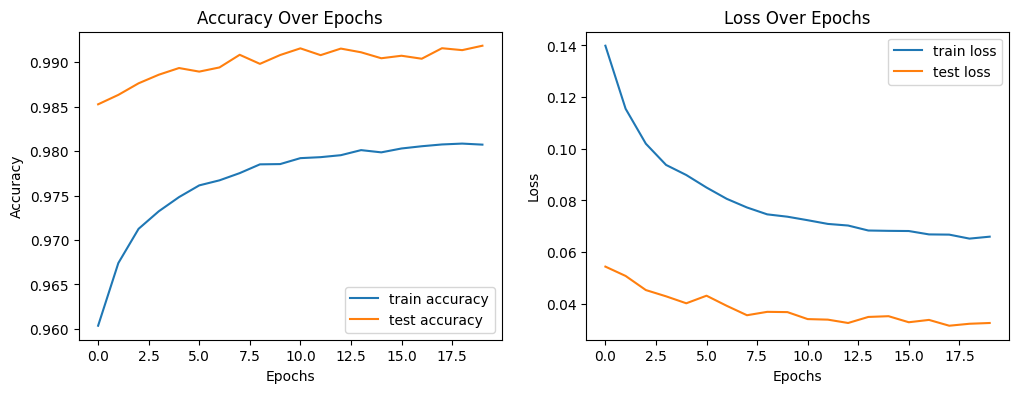

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()


In [11]:
def predict_character(image):
    with open('first_model.pkl', 'rb') as file:
        model = pickle.load(file)

    # Preprocess the input image
    image = image.reshape(1, 28, 28, 1)
    image = image / 255.0

    # Predict the character
    prediction = model.predict(image)
    character = chr(np.argmax(prediction) + 65)  # Convert to corresponding character

    return character

In [12]:
from PIL import Image, ImageOps

# Function to check if the majority of the image is white
def is_majority_white(image, threshold=0.5):
    # Convert image to numpy array
    img_array = np.array(image)
    # Calculate the fraction of white pixels
    white_pixels = np.sum(img_array > 128)
    total_pixels = img_array.size
    return (white_pixels / total_pixels) > threshold

def invert_image(image):
    if is_majority_white(image):
        return ImageOps.invert(image)
    return image

# Load and preprocess the image
def load_image(image_path):
    # Load image in grayscale mode
    img = Image.open(image_path).convert('L')
    img = invert_image(img)
    # Resize to 28x28
    img = img.resize((28, 28))
    # Convert to numpy array
    img = np.array(img)
    return img

In [13]:
# Example usage
image_path = 'D:\\codes\\OCR\\dataset\\test light\c.jpg'
image = load_image(image_path)
predicted_character = predict_character(image)
print(f'The predicted character is: {predicted_character}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
The predicted character is: C
